# [Neurônio de McCulloch-Pitts](https://cin.ufpe.br/~gcv/web_lci/Aula-Perceptrons.pdf)

In [1]:
import numpy
import random
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Math

%matplotlib inline

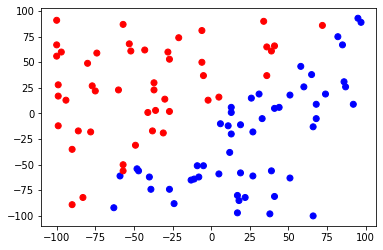

In [2]:
# As amostras serão divididas de modo que quando x < y, a amostra pertence ao
# grupo 1 e quando x >= y a amostra pertence ao grupo -1

label = lambda x, y: 1 if x < y else -1

# Amostragem aleatória

sample = numpy.random.randint(-100, 100, (100, 2))
x, y = zip(*sample)

class_color = ['red' if x<y else 'blue' for x, y in sample]
scat = plt.scatter(x, y, c=class_color, label=class_color)
plt.show()

## Função de ativação: step

![step_function](https://www.cs.bham.ac.uk/~mmk/Teaching/AI/figures/bipolar-threshold.jpg)

In [3]:
def step(n):
  '''
  Função de ativação
  retorna o sinal do parâmetro n
  '''
  return 1 if n >0 else -1

# Neurônio de McCulloch-Pitts

![perceptron](https://www.deeplearningbook.com.br/wp-content/uploads/2017/12/perceptron.png)

Regra de propagação: $y = f_h [\sum_{i=1}^nw_ix_i - \theta]$

Algoritmo de aprendizagem:

Se um padrão é corretamente classificado:
* $W(t+1) = W(t)$, se $\sum w_ix_i - \theta\geq0$ e $x$ pertence a C1
* $W(t+1) = W(t)$, se $\sum w_ix_i - \theta\lt0$ e $x$ pertence a C2

Se um padrão é incorretamente classificado:
* $W(t+1) = W(t)-\eta x$, se $\sum w_ix_i - \theta\geq0$ e $x$ pertence a C1
* $W(t+1) = W(t)+\eta x$, se $\sum w_ix_i - \theta\lt0$ e $x$ pertence a C2

Usando $\theta=0.5$ e $\eta=0.4$

<!-- Dada uma rede do tipo Perceptron formada por um neurônio com três terminais de entrada, utilizando pesos iniciais $w_0=0.4$, $w_1=-0.6$ e $w_2=0.6$, limiar $\theta=0.5$ e taxa de aprendizado $\eta=0.4$, -->

In [4]:
class Neuron(object):
  def __init__(self, cardinality = 2, theta = 0.5, etha = 0.4):
    self.weights = numpy.random.uniform(-1, 1, (cardinality,))
    self.theta = theta
    self.etha = etha
  
  def evaluate(self, sample: list):
    _sum = (
        sum([sample[t]*self.weights[t] for t in range(len(sample))]) - self.theta
    )
    return step(_sum)

  def train(self, sample: list, target: int):
    estimate = self.evaluate(sample)
    error = target - estimate # se a estimativa estiver correta, error == 0
    for i in range(len(sample)):
        self.weights[i] += error * self.etha * sample[i]


## Plotagem da curva
$ w_1x_1 + w_2x_2 - \theta = 0$


$x_1 = 0
\to
w_1*0+w_2x_2 - \theta = 0
\to
x_2 = \frac{\theta}{w_2}$

$x_2 = 0
\to
w_1x_1 + w_2*0 - \theta = 0
\to
x_1 = \frac{\theta}{w_1}$

Pontos da reta $(0, \frac{\theta}{w_2})$ e $(\frac{\theta}{w_1}, 0)$

Usando a propriedade de alinhamento dos pontos temos:

$\begin{vmatrix}
x & y & 1\\
0 & \frac{\theta}{w_2} & 1\\
\frac{\theta}{w_1} & 0 & 1
\end{vmatrix} = 0$

$ \frac{x\theta}{w_2} + \frac{y\theta}{w_1} - \frac{\theta^2}{w_1w_2} = 0$

$\frac{x\theta}{w_2} - \frac{t\theta^2}{w_1w_2} = - \frac{y\theta}{w_1}$

$(\frac{w_1}{\theta}) (\frac{x\theta}{w_2} - \frac{\theta^2}{w_1w_2}) = - y$

$\frac{xw_1\theta}{w_2\theta}) - (\frac{\theta^2w_1}{w_1w_2\theta}) = - y$

$\frac{xw_1}{w_2} - \frac{\theta}{w_2} = - y$

$ - x\frac{w_1}{w_2} + \frac{\theta}{w_2} = y$

In [5]:
neuron = Neuron()
for p in sample:
    target = label(*p)
    neuron.train(p, target)

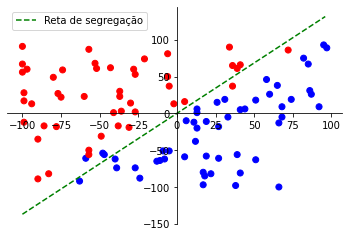

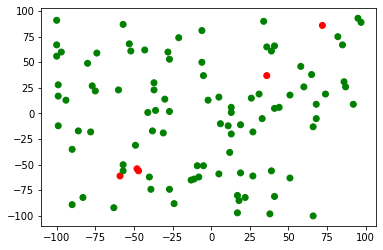

In [6]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=class_color)


max_x = max(sample, key=lambda p: p[0])[0]
min_x = min(sample, key=lambda p: p[0])[0]
w1 = neuron.weights[0]
w2 = neuron.weights[1]
t = neuron.theta

x_ = []
y_ = []

for i in range(min_x, max_x):
  x_.append(i)
  y_.append(i * (-w1/w2) + (t/w2))

ax.plot(x_, y_, 'g--', label="Reta de segregação")
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
ax.legend()

plt.show()

guess_color = [
  'green' if label(*p) == neuron.evaluate(p) else 'red' for p in sample
]

fig, ax = plt.subplots()
ax.scatter(x, y, c=guess_color)
plt.show()

In [7]:
print(f'y = (-x * {w1} + {t})/{w2})')

y = (-x * -110.40199659460335 + 0.5)/80.59125401163197)
